In [1]:
import pandas as pd
import numpy as np

In [2]:
path = '/home/srgrace/genericContest_data/predict_ad\'s_success/'

In [3]:
import os

train = pd.read_csv(os.path.join(path, 'Train.csv'))
train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 12 columns):
id                                   26048 non-null int64
realtionship_status                  26048 non-null object
industry                             26048 non-null object
genre                                26048 non-null object
targeted_sex                         26048 non-null object
average_runtime(minutes_per_week)    26048 non-null int64
airtime                              26048 non-null object
airlocation                          26048 non-null object
ratings                              26048 non-null float64
expensive                            26048 non-null object
money_back_guarantee                 26048 non-null object
netgain                              26048 non-null bool
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 2.2+ MB


In [5]:
for col in train.columns:
    print(train[col].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0


In [6]:
for col in train.columns:
    print('****************************************')
    print(train[col].unique())
    print(train[col].value_counts())

****************************************
[19717 31593  5681 ...  2295 17902 30877]
2047     1
17762    1
19779    1
30020    1
32069    1
25926    1
5448     1
1354     1
13644    1
11599    1
21856    1
23905    1
19811    1
21888    1
30052    1
32101    1
25958    1
28007    1
5480     1
7529     1
1386     1
3435     1
13676    1
15725    1
17730    1
23873    1
21824    1
11567    1
19715    1
32005    1
        ..
23198    1
21151    1
10928    1
8881     1
8817     1
21087    1
10800    1
23134    1
8753     1
14898    1
12851    1
2612     1
565      1
6710     1
4663     1
27192    1
25145    1
29243    1
16957    1
21055    1
10832    1
8785     1
14930    1
12883    1
6742     1
31322    1
29275    1
19036    1
16989    1
2049     1
Name: id, Length: 26048, dtype: int64
****************************************
['Married-spouse-absent' 'Married-civ-spouse' 'Divorced' 'Separated'
 'Never-married' 'Widowed' 'Married-AF-spouse']
Married-civ-spouse       11844
Never-married      

In [7]:
from sklearn import preprocessing
import pickle

# Label Encoding our target variable 
lbl_enc = preprocessing.LabelEncoder()
train['netgain'] = lbl_enc.fit_transform(train['netgain'])
pickle.dump(lbl_enc, open(os.path.join('data/', 'netgain_enc.pickle'), 'wb'))


#One Hot Encoding of the Categorical features
one_hot_realtionship_status = pd.get_dummies(train.realtionship_status)
one_hot_industry = pd.get_dummies(train.industry)
one_hot_genre = pd.get_dummies(train.genre)
one_hot_targeted_sex = pd.get_dummies(train.targeted_sex)
one_hot_airtime = pd.get_dummies(train.airtime)
one_hot_airlocation = pd.get_dummies(train.airlocation)
one_hot_expensive = pd.get_dummies(train.expensive)
one_hot_money_back_guarantee = pd.get_dummies(train.money_back_guarantee)

# removing categorical features 
train.drop(['realtionship_status', 'industry', 'genre', 'targeted_sex', 'airtime', 
            'airlocation', 'expensive', 'money_back_guarantee'],axis=1, inplace=True) 

 

# Merging one hot encoded features with our dataset 'train' 
train = pd.concat([train, one_hot_realtionship_status, one_hot_industry, one_hot_genre, one_hot_targeted_sex, 
                   one_hot_airtime, one_hot_airlocation, one_hot_expensive, one_hot_money_back_guarantee], axis=1) 



train.head()

,id,average_runtime(minutes_per_week),ratings,netgain,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,...,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,High,Low,Medium,No,Yes
0,19717,45,0.027465,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,31593,45,0.027465,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,5681,45,0.027465,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,15491,40,0.027465,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
4,23587,48,0.027465,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [8]:

train.netgain.value_counts()

0    19853
1     6195
Name: netgain, dtype: int64

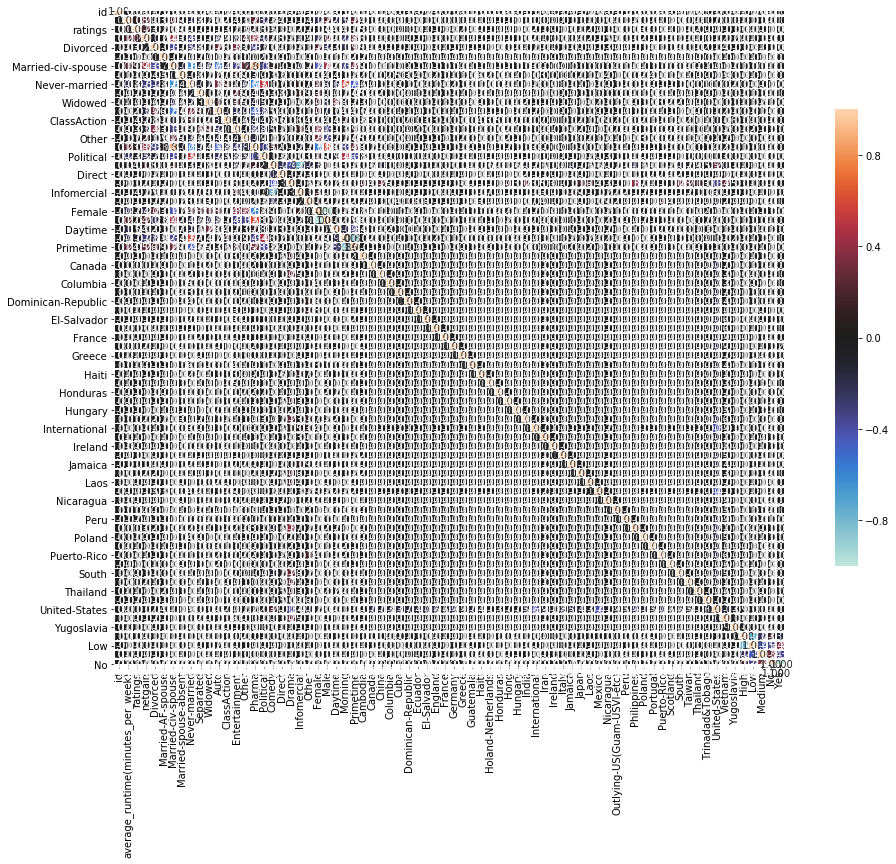

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(18,12))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(train)

In [11]:
x = train.loc[:, ~train.columns.isin(['id', 'netgain'])].values
print(x)

y = train['netgain']
print(y)

[[4.50000000e+01 2.74646723e-02 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [4.50000000e+01 2.74646723e-02 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [4.50000000e+01 2.74646723e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [2.50000000e+01 1.02233936e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [4.80000000e+01 2.74646723e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [4.00000000e+01 2.74646723e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]
0        0
1        0
2        0
3        0
4        1
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       1
18       0
19       1
20       0
21       1
22       0
23       0
24       0
25       0
26       0
27       1
28       0
29       0
        ..
26018    1
26019    0
26020    0
26021    1
26022    0
2602

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


# smote = SMOTE(random_state=42)
# x_sm, y_sm = smote.fit_sample(x, y)

# ros = RandomUnderSampler(random_state=0)
# ros.fit(x, y)
# x_sm, y_sm = ros.sample(x, y)

# print(Counter(y_sm))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=37)

clf = XGBClassifier()
clf.fit(x_train, y_train)
pickle.dump(clf, open('./data/xgb.pickle', 'wb'))

pred = clf.predict(x_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[3642  265]
 [ 726  577]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3907
           1       0.69      0.44      0.54      1303

   micro avg       0.81      0.81      0.81      5210
   macro avg       0.76      0.69      0.71      5210
weighted avg       0.80      0.81      0.79      5210



In [30]:
from sklearn.ensemble import RandomForestClassifier


clf1 = RandomForestClassifier()
clf1.fit(x_train, y_train)
pickle.dump(clf1, open('./data/rf.pickle', 'wb'))

pred1 = clf1.predict(x_test)

print(confusion_matrix(y_test, pred1))
print(classification_report(y_test, pred1))

/home/srgrace/PycharmProjects/generic-venv/py3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[3548  359]
 [ 682  621]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3907
           1       0.63      0.48      0.54      1303

   micro avg       0.80      0.80      0.80      5210
   macro avg       0.74      0.69      0.71      5210
weighted avg       0.79      0.80      0.79      5210



In [15]:
test = pd.read_csv(os.path.join(path, 'Test.csv'))
test.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,1,Widowed,Auto,Comedy,Female,10,Daytime,United-States,0.027465,Low,No
1,4,Married-civ-spouse,Pharma,Comedy,Male,40,Morning,United-States,0.056262,High,Yes
2,5,Divorced,Entertainment,Comedy,Female,50,Morning,United-States,0.027465,Low,No
3,9,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,No
4,10,Married-civ-spouse,Pharma,Comedy,Male,40,Primetime,United-States,0.027465,Low,Yes


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 11 columns):
id                                   6513 non-null int64
realtionship_status                  6513 non-null object
industry                             6513 non-null object
genre                                6513 non-null object
targeted_sex                         6513 non-null object
average_runtime(minutes_per_week)    6513 non-null int64
airtime                              6513 non-null object
airlocation                          6513 non-null object
ratings                              6513 non-null float64
expensive                            6513 non-null object
money_back_guarantee                 6513 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 559.8+ KB


In [17]:
netgain_enc = pickle.load(open('data/netgain_enc.pickle', 'rb'))

#One Hot Encoding of the Categorical features
one_hot_realtionship_status = pd.get_dummies(test.realtionship_status)
one_hot_industry = pd.get_dummies(test.industry)
one_hot_genre = pd.get_dummies(test.genre)
one_hot_targeted_sex = pd.get_dummies(test.targeted_sex)
one_hot_airtime = pd.get_dummies(test.airtime)
one_hot_airlocation = pd.get_dummies(test.airlocation)
one_hot_expensive = pd.get_dummies(test.expensive)
one_hot_money_back_guarantee = pd.get_dummies(test.money_back_guarantee)

# removing categorical features 
test.drop(['realtionship_status', 'industry', 'genre', 'targeted_sex', 'airtime', 
            'airlocation', 'expensive', 'money_back_guarantee'],axis=1, inplace=True) 

 

# Merging one hot encoded features with our dataset 'train' 
test = pd.concat([test, one_hot_realtionship_status, one_hot_industry, one_hot_genre, one_hot_targeted_sex, 
                   one_hot_airtime, one_hot_airlocation, one_hot_expensive, one_hot_money_back_guarantee], axis=1) 



test.head()



,id,average_runtime(minutes_per_week),ratings,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,...,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,High,Low,Medium,No,Yes
0,1,10,0.027465,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,4,40,0.056262,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,5,50,0.027465,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,9,40,0.027465,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,10,40,0.027465,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [18]:
train.columns

Index(['id', 'average_runtime(minutes_per_week)', 'ratings', 'netgain',
       'Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed',
       'Auto', 'ClassAction', 'Entertainment', 'Other', 'Pharma', 'Political',
       'Comedy', 'Direct', 'Drama', 'Infomercial', 'Other', 'Female', 'Male',
       'Daytime', 'Morning', 'Primetime', 'Cambodia', 'Canada', 'China',
       'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador',
       'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti',
       'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India',
       'International', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos',
       'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South',
       'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam',
       'Yugoslavia', 'High', 'Low', 'Medium'

In [19]:
test.columns

Index(['id', 'average_runtime(minutes_per_week)', 'ratings', 'Divorced',
       'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Widowed', 'Auto', 'ClassAction',
       'Entertainment', 'Other', 'Pharma', 'Political', 'Comedy', 'Direct',
       'Drama', 'Infomercial', 'Other', 'Female', 'Male', 'Daytime', 'Morning',
       'Primetime', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba',
       'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France',
       'Germany', 'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hong',
       'Hungary', 'India', 'International', 'Iran', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua',
       'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand',
       'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia', 'High',
       'Low', 'Medium', 'No', 'Yes'],
      dtype='obje

In [20]:
set(train.columns) - set(test.columns)

{'Holand-Netherlands', 'netgain'}

In [21]:
test['Holand-Netherlands'] = np.zeros(len(test))

In [22]:
set(train.columns) - set(test.columns)

{'netgain'}

In [31]:
import lightgbm as lgb

d_train = lgb.Dataset(x_train, label=y_train)

params = {'num_leaves':150, 'objective':'binary', 'metric': 'binary_logloss', 'max_depth':7, 
          'learning_rate':.05, 'max_bin':200}


clf2 = lgb.train(params, d_train, 100)
pickle.dump(clf2, open('./data/lgb.pickle', 'wb'))

pred2 = clf2.predict(x_test)

#convert into binary values
def convert(pred2):
    for i in range(len(pred2)):
        if pred2[i] >= .5:
            pred2[i] = 1
        else:  
            pred2[i] = 0
    return pred2

print(confusion_matrix(y_test, convert(pred2)))
print(classification_report(y_test, convert(pred2)))

[[3645  262]
 [ 722  581]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3907
           1       0.69      0.45      0.54      1303

   micro avg       0.81      0.81      0.81      5210
   macro avg       0.76      0.69      0.71      5210
weighted avg       0.80      0.81      0.80      5210



In [32]:
model = pickle.load(open('./data/xgb.pickle', 'rb'))

prediction = model.predict(test.loc[:, ~test.columns.isin(['id'])].values)
    
submission = pd.DataFrame(
    {'id': test['id'],
     'netgain': netgain_enc.inverse_transform([int(x) for x in convert(prediction)])
    })
submission.to_csv('./data/xgb_submission.csv', index=False)

In [33]:
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


In [34]:
kfold = StratifiedKFold(n_splits=10)

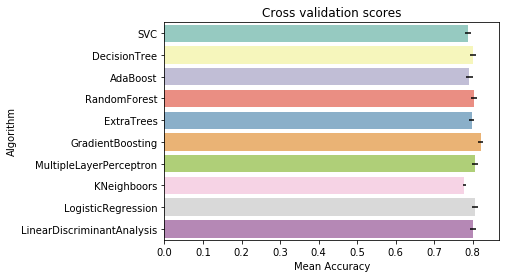

In [28]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


In [29]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(x_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/home/srgrace/PycharmProjects/generic-venv/py3.7/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   59.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  8.6min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed: 11.3min finished


0.8189365582109608

In [35]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(x_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 12.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 27.9min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed: 47.4min finished


0.8189845474613686

In [34]:
# LogisticRegression tunning

LRC = LogisticRegression(solver='liblinear', multi_class='ovr')
lrc_param_grid = {'C': [1, 10, 50, 100, 200, 500, 1000]}

gsLRC = GridSearchCV(LRC,param_grid = lrc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsLRC.fit(x_train,y_train)

LRC_best = gsLRC.best_estimator_

# Best score
gsLRC.best_score_

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:   11.1s finished


0.8073711488626548

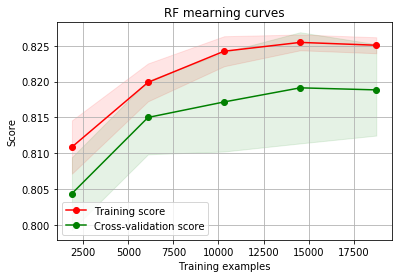

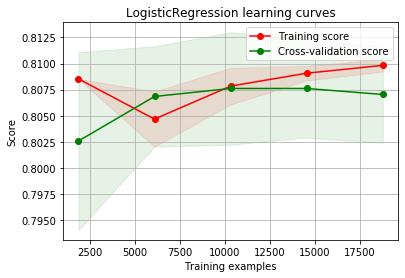

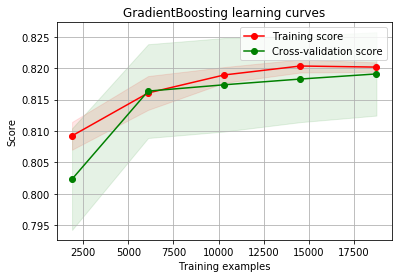

In [35]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",x_train,y_train,cv=kfold)
g = plot_learning_curve(gsLRC.best_estimator_,"LogisticRegression learning curves",x_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",x_train,y_train,cv=kfold)

In [44]:
# feature_importances = pd.DataFrame(RFC_best.feature_importances_,
#                                    index = train.loc[:, ~train.columns.isin(['id', 'netgain'])][:].columns,
#                                    columns=['importance']).sort_values('importance',ascending=False)
# feature_importances

for feature in zip(train.loc[:, ~train.columns.isin(['id', 'netgain'])][:].columns, RFC_best.feature_importances_):
    print(feature)

('average_runtime(minutes_per_week)', 0.06671359774588502)
('ratings', 0.2737232955419903)
('Divorced', 0.013603298162109534)
('Married-AF-spouse', 7.779339250285883e-05)
('Married-civ-spouse', 0.1978271727872092)
('Married-spouse-absent', 0.000445879735365118)
('Never-married', 0.044585174506269344)
('Separated', 0.002458584601061362)
('Widowed', 0.0018342082533764615)
('Auto', 0.02470297544626148)
('ClassAction', 0.0028474934297994716)
('Entertainment', 0.013497679382241052)
('Other', 0.027039157282474673)
('Pharma', 0.12663125027125208)
('Political', 0.025835809845529197)
('Comedy', 0.0033860755771807694)
('Direct', 0.00014528547519956315)
('Drama', 0.001048380877681556)
('Infomercial', 0.004259841390774843)
('Other', 0.00019228282975887595)
('Female', 0.016819575672988984)
('Male', 0.013580786331975701)
('Daytime', 0.00451347712369996)
('Morning', 0.06230126442130269)
('Primetime', 0.05332291145291298)
('Cambodia', 0.0)
('Canada', 2.8447492373660497e-05)
('China', 7.508242310089375

In [45]:
for feature in zip(train.loc[:, ~train.columns.isin(['id', 'netgain'])][:].columns, GBC_best.feature_importances_):
    print(feature)

('average_runtime(minutes_per_week)', 0.06851761072252609)
('ratings', 0.3307666733850474)
('Divorced', 0.0012150591411555676)
('Married-AF-spouse', 0.0)
('Married-civ-spouse', 0.26899867602416244)
('Married-spouse-absent', 0.0)
('Never-married', 0.0465315410183758)
('Separated', 6.183579717350641e-05)
('Widowed', 1.7536679518684783e-05)
('Auto', 0.0025109392435434612)
('ClassAction', 1.3403013730461365e-05)
('Entertainment', 0.0023951000090740816)
('Other', 0.03213309916250766)
('Pharma', 0.12829120606693503)
('Political', 0.0018532690615161523)
('Comedy', 0.001135221388670136)
('Direct', 5.535073754697099e-05)
('Drama', 0.00033042487500795125)
('Infomercial', 0.0031215538910058845)
('Other', 0.0)
('Female', 0.007725349336273219)
('Male', 0.0068093415058468375)
('Daytime', 0.0011744112477540753)
('Morning', 0.03807756422834118)
('Primetime', 0.04659265491635305)
('Cambodia', 0.0)
('Canada', 0.0)
('China', 0.0)
('Columbia', 0.0)
('Cuba', 0.0)
('Dominican-Republic', 0.0)
('Ecuador', 0.0

In [101]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(GBC_best, threshold=0.1)

# Train the selector
sfm.fit(x_train, y_train)

SelectFromModel(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=4,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=100, min_sam...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.1)

In [102]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(train.loc[:, ~train.columns.isin(['id', 'netgain'])][:].columns[feature_list_index])

ratings
Married-civ-spouse
Pharma


In [103]:
x_important_train = sfm.transform(x_train)
x_important_test = sfm.transform(x_test)

In [ ]:
from xgboost import XGBClassifier

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [36]:
# Ensemble modeling

# votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('gbc',GBC_best), ('lrc',LRC_best)], voting='soft', n_jobs=4)
votingC = VotingClassifier(estimators=[('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(x_train, y_train)
pickle.dump(votingC, open('./data/voting_clf.pickle', 'wb'))

pred = votingC.predict(x_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[3629  278]
 [ 714  589]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3907
           1       0.68      0.45      0.54      1303

   micro avg       0.81      0.81      0.81      5210
   macro avg       0.76      0.69      0.71      5210
weighted avg       0.80      0.81      0.80      5210



In [37]:
model = pickle.load(open('./data/voting_clf.pickle', 'rb'))

prediction = model.predict(test.loc[:, ~test.columns.isin(['id'])].values)
    
submission = pd.DataFrame(
    {'id': test['id'],
     'netgain': netgain_enc.inverse_transform(prediction)
    })
submission.to_csv('./data/voting_submission.csv', index=False)

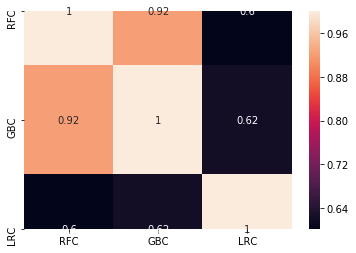

In [100]:
test_RFC = pd.Series(RFC_best.predict(x_test), name="RFC")
test_GBC = pd.Series(GBC_best.predict(x_test), name="GBC")
test_LRC = pd.Series(LRC_best.predict(x_test), name="LRC")

# Concatenate all classifier results
ensemble_results = pd.concat([test_RFC, test_GBC, test_LRC],axis=1)

g = sns.heatmap(ensemble_results.corr(),annot=True)

In [165]:
# Neural Network
import keras 
from keras.models import Sequential 
from keras.layers import Dense

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 72))
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 9)                 657       
_________________________________________________________________
dense_6 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 50        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 803
Trainable params: 803
Non-trainable params: 0
_________________________________________________________________


In [169]:
from keras.callbacks import EarlyStopping

# Compiling the NN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the NN
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
model.fit(x_train, y=y_train, batch_size=50, epochs=100,
          verbose=1, validation_data=(x_test, y_test), callbacks=[earlystop])


Train on 16670 samples, validate on 5210 samples
Epoch 1/100
16670/16670 [==============================] - 1s 42us/step - loss: 0.3687 - acc: 0.8086 - val_loss: 0.3827 - val_acc: 0.8119
Epoch 2/100
16670/16670 [==============================] - 0s 28us/step - loss: 0.3680 - acc: 0.8100 - val_loss: 0.3840 - val_acc: 0.8140
Epoch 3/100
16670/16670 [==============================] - 0s 28us/step - loss: 0.3676 - acc: 0.8136 - val_loss: 0.3842 - val_acc: 0.8138
Epoch 4/100
16670/16670 [==============================] - 0s 27us/step - loss: 0.3680 - acc: 0.8094 - val_loss: 0.3882 - val_acc: 0.8084


In [172]:
y_pred = model.predict(test.loc[:, ~test.columns.isin(['id'])].values)
y_final = (y_pred > 0.5).astype(int).reshape(test.shape[0])
print(y_final)

submission = pd.DataFrame(
    {'id': test['id'],
     'netgain': netgain_enc.inverse_transform(y_final)
    })
submission.to_csv('./data/neural_net_submission.csv', index=False)

[0 0 0 ... 0 0 0]
